<a href="https://colab.research.google.com/github/SchultzVV/SchultzVV/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random as rd
import sys as s
import glob
import math
import numpy as np
import pickle
from PIL import Image
import os
import cv2
#-------------------------------------------------------------------------------

def Dataset(path):
    O=[];    A=[]
    for image in glob.glob(path+"/*.png"):
        img = mpimg.imread(image)
        #plt.imshow(img)
        #plt.show()
        img = img[267:635,1500:2141]
        Input=np.zeros(np.shape(img)[0]*np.shape(img)[1]*3)
        Output=np.zeros(np.shape(img)[0]*np.shape(img)[1]*3)
        xmax = img.shape[0];    ymax = img.shape[1]
        aux=0
        for k in range(0,ymax):
            for j in range(0,xmax):
                Input[aux]=img[j,k][0]
                aux+=1
                Input[aux]=img[j,k][1]
                aux+=1
                Input[aux]=img[j,k][2]
                aux+=1
        O.append(Input)
        for k in range(0,ymax):
            for j in range(0,xmax):
                if img[j,k][0]>0.75 and img[j,k][1]>0.75 and img[j,k][2]>0.75:
                    img[j,k][0] = 0;                img[j,k][1] = 1
                    img[j,k][2] = 0
        for k in range(0,ymax):
            for j in range(0,xmax):
                if abs(img[j,k][0]-img[j,k][1])<0.3 and abs(img[j,k][1]-img[j,k][2])<0.14:
                    img[j,k][0] = 0;                img[j,k][1] = 0
                    img[j,k][2] = 1
        for k in range(0,ymax):
            for j in range(0,xmax):
                img[j,k][0] = 0
                if img[j,k][1]!=1:
                    img[j,k][1] = 0
                if img[j,k][2]!=1:
                    img[j,k][2] = 0
        A.append(Output)
    O=np.array(O).reshape(3,3,np.shape(img)[0]*np.shape(img)[1]*3)
    A=np.array(A).reshape(3,3,np.shape(img)[0]*np.shape(img)[1]*3)
    address = open("O_train","wb");    pickle.dump(O, address);    address.close()
    address = open("A_train","wb");    pickle.dump(A, address);    address.close()
    print('np.shape(A)',np.shape(A))
    print('np.shape(O)',np.shape(O))
Dataset('/home/v/MEGAsync/Getter/01042019-FF/fixed')

UnboundLocalError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 9.png to 9.png
Saving 8.png to 8.png
Saving 7.png to 7.png
Saving 6.png to 6.png
Saving 5.png to 5.png
Saving 4.png to 4.png
Saving 3.png to 3.png
Saving 2.png to 2.png
Saving 1.png to 1.png


(1993, 3396, 3)


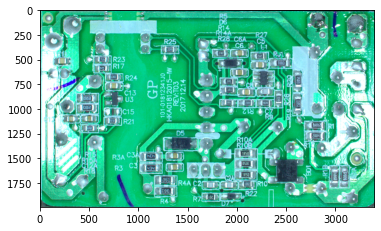

In [ ]:
import io
import matplotlib.pyplot as plt

img = mpimg.imread(io.BytesIO(uploaded['1.png']))
print(np.shape(img))
plt.imshow(img)
plt.show()


In [ ]:
def Dataset():
    O=[];    A=[]
    for i in range(0,9):#glob.glob(path+"/*.png"):
        img = mpimg.imread(io.BytesIO(uploaded[str(i+1)+'.png']))
        #plt.imshow(img)
        #plt.show()
        img = img[267:635,1500:2141]
        Input=np.zeros(np.shape(img)[0]*np.shape(img)[1]*2)
        Output=np.zeros(np.shape(img)[0]*np.shape(img)[1]*2)
        xmax = img.shape[0];    ymax = img.shape[1]
        aux=0
        for k in range(0,ymax):
            for j in range(0,xmax):
                #Input[aux]=img[j,k][0]
                #aux+=1
                Input[aux]=img[j,k][1]
                aux+=1
                Input[aux]=img[j,k][2]
                aux+=1
        O.append(Input)
        for k in range(0,ymax):
            for j in range(0,xmax):
                if img[j,k][0]>0.75 and img[j,k][1]>0.75 and img[j,k][2]>0.75:
                    img[j,k][0] = 0;                img[j,k][1] = 1
                    img[j,k][2] = 0
        for k in range(0,ymax):
            for j in range(0,xmax):
                if abs(img[j,k][0]-img[j,k][1])<0.3 and abs(img[j,k][1]-img[j,k][2])<0.14:
                    img[j,k][0] = 0;                img[j,k][1] = 0
                    img[j,k][2] = 1
        for k in range(0,ymax):
            for j in range(0,xmax):
                img[j,k][0] = 0
                if img[j,k][1]!=1:
                    img[j,k][1] = 0
                if img[j,k][2]!=1:
                    img[j,k][2] = 0
        aux=0
        for k in range(0,ymax):
            for j in range(0,xmax):
                #Input[aux]=img[j,k][0]
                #aux+=1
                Output[aux]=img[j,k][1]
                aux+=1
                Output[aux]=img[j,k][2]
                aux+=1
        #plt.imshow(img)
        #plt.show()
        A.append(Output)
    O=np.array(O).reshape(3,3,np.shape(img)[0]*np.shape(img)[1]*2)
    A=np.array(A).reshape(3,3,np.shape(img)[0]*np.shape(img)[1]*2)
    O=torch.as_tensor(O)
    A=torch.as_tensor(A)
    address = open("O_train","wb");    pickle.dump(O, address);    address.close()
    address = open("A_train","wb");    pickle.dump(A, address);    address.close()
    print('np.shape(A)',np.shape(A))
    print('np.shape(O)',np.shape(O))
    return O,A
O_train,A_train=Dataset()

(368, 641, 3)


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [ ]:
#-----------------ORGANIZE DATA-------------------------------------------------

n_batch=np.shape(O_train)[0]
batch_size=np.shape(O_train)[1]
n_examples=np.shape(O_train)[2]

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(n_examples,400),
            nn.ELU(),
            nn.Linear(400,100),
            nn.ELU(),
            nn.Linear(100,50),
            nn.ELU(),
            nn.Linear(50,10), # -> latent
            nn.ELU(),
        )
        self.decoder=nn.Sequential(
            nn.Linear(10,50),
            nn.ELU(),
            nn.Linear(50,100),
            nn.ELU(),
            nn.Linear(100,400),
            nn.ELU(),
            nn.Linear(400,n_examples),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded,encoded
#-------------------------------------------------------------------------------
#------------------CHAMA O MODELO E INICIA CAMADAS DE PESOS ORTOGONAIS----------
#-------------------------------------------------------------------------------
model = Autoencoder()
for m in model.modules():
    if isinstance(m, (nn.Conv2d, nn.Linear)):
        nn.init.orthogonal_(m.weight)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())#,lr=1e-4,weight_decay = 1e-5)
#optimizer = torch.optim.SGD(model.parameters(),lr=1e-4,weight_decay = 1e-5)#,momentum=0.5)

In [ ]:
#---------------------------TREINO----------------------------------------------
def treine(epochs):
    inp = pickle.load( open( "O_train", "rb" ) )
    #question= pickle.load( open( "Q", "rb" ) )
    out =  pickle.load( open( "A_train", "rb" ) )
    n_batch=np.shape(O_train)[0]
    batch_size=np.shape(O_train)[1]
    n_examples=np.shape(O_train)[2]
    for epoch in range(epochs):
        for batch_idx in range(n_batch):
            O=inp[batch_idx]
#            Q=question[batch_idx]
            A=out[batch_idx]
            O=O.float()
            A=A.float()
            recon,latent = model(O)
            loss=torch.mean((recon-A)**2)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'Epoch:{epoch+1},Loss:{loss.item():.4f}')
treine(50)

Epoch:1,Loss:0.0662
Epoch:2,Loss:0.0743
Epoch:3,Loss:0.0552
Epoch:4,Loss:0.0556
Epoch:5,Loss:0.0543
Epoch:6,Loss:0.0552
Epoch:7,Loss:0.0522
Epoch:8,Loss:0.0545
Epoch:9,Loss:0.0487
Epoch:10,Loss:0.0482
Epoch:11,Loss:0.0472
Epoch:12,Loss:0.0478
Epoch:13,Loss:0.0727
Epoch:14,Loss:0.0511
Epoch:15,Loss:0.0669
Epoch:16,Loss:0.0488
Epoch:17,Loss:0.0537
Epoch:18,Loss:0.0472
Epoch:19,Loss:0.0452
Epoch:20,Loss:0.0419
Epoch:21,Loss:0.0453
Epoch:22,Loss:0.0527
Epoch:23,Loss:0.0531
Epoch:24,Loss:0.0470
Epoch:25,Loss:0.0531
Epoch:26,Loss:0.0443
Epoch:27,Loss:0.0428
Epoch:28,Loss:0.0421
Epoch:29,Loss:0.0435
Epoch:30,Loss:0.0460
Epoch:31,Loss:0.0664
Epoch:32,Loss:0.0512
Epoch:33,Loss:0.0657
Epoch:34,Loss:0.0488
Epoch:35,Loss:0.0488
Epoch:36,Loss:0.0482
Epoch:37,Loss:0.0420
Epoch:38,Loss:0.0615
Epoch:39,Loss:0.0563
Epoch:40,Loss:0.0628
Epoch:41,Loss:0.0518
Epoch:42,Loss:0.0453
Epoch:43,Loss:0.0464
Epoch:44,Loss:0.0454
Epoch:45,Loss:0.0841
Epoch:46,Loss:0.0502
Epoch:47,Loss:0.0630
Epoch:48,Loss:0.0532
E

In [ ]:
recon,latent = model(O_train[0].float())
print(np.shape(recon[0]))
print(np.shape(latent))
print(latent)
xmax = 368;    ymax = 641
aux=0
img = Image.new("RGB", (xmax,ymax))
pixels = img.load()
A=recon[0].reshape(368,641,2)
print(np.shape(A))
for x in range(xmax):
    for y in range(ymax):
        print(A[x][y])
        #print(np.shape(AA))
        #print(np.shape(B))
        pixels[x,y] = A[x][y]
for k in range(0,ymax):
    for j in range(0,xmax):
        #Input[aux]=img[j,k][0]
        #aux+=1
        Input[aux]=img[j,k][1]
        aux+=1
        Input[aux]=img[j,k][2]
        aux+=1
#for i in range(0,xmax)


torch.Size([471776])
torch.Size([3, 10])
tensor([[ -1.0000,  -1.0000,  -1.0000,  -1.0000,  -1.0000,  -1.0000,  -1.0000,
         183.7863,  -1.0000, 139.8483],
        [ -1.0000,  -1.0000,  -1.0000,  -1.0000,  -1.0000,  -1.0000,  -1.0000,
          89.9981,  -1.0000,  88.8065],
        [ -1.0000,  -1.0000,  -1.0000,  -1.0000,  -1.0000,  -1.0000,  -1.0000,
          -1.0000,  -1.0000, 224.2508]], grad_fn=<EluBackward0>)
torch.Size([368, 641, 2])
tensor([-0.0358, -0.0056], grad_fn=<SelectBackward>)


SystemError: ignored